In [33]:
# STEP 1: Install OpenCV
!pip install -q opencv-python

# STEP 2: Load TensorFlow digits dataset (digits 0–9 in images)
from sklearn.datasets import load_digits
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

digits = load_digits()
images = digits.images
labels = digits.target

# Normalize & reshape
images = images / 16.0
images = images.reshape(-1, 8, 8, 1)

# Resize from 8x8 to 28x28 (to match real digit scale)
images_resized = np.array([cv2.resize(img, (28, 28)) for img in images])
images_resized = images_resized.reshape(-1, 28, 28, 1)

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(images_resized, labels, test_size=0.2, random_state=42)

# One-hot encode labels
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train_cat, epochs=5, batch_size=32, validation_split=0.1)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
41/41 ━━━━━━━━━━━━━━━━━━━━ 8s 70ms/step - accuracy: 0.4010 - loss: 1.8310 - val_accuracy: 0.8403 - val_loss: 0.5783
Epoch 2/5
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.8658 - loss: 0.4354 - val_accuracy: 0.9375 - val_loss: 0.2613
Epoch 3/5
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.9421 - loss: 0.2052 - val_accuracy: 0.9514 - val_loss: 0.1234
Epoch 4/5
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9656 - loss: 0.1196 - val_accuracy: 0.9514 - val_loss: 0.1405
Epoch 5/5
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9660 - loss: 0.1199 - val_accuracy: 0.9792 - val_loss: 0.0856


In [35]:
loss, acc = model.evaluate(x_test, y_test_cat)
print(f"\n✅ Accuracy: {acc:.4f}")

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9674 - loss: 0.0829

✅ Accuracy: 0.9667


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


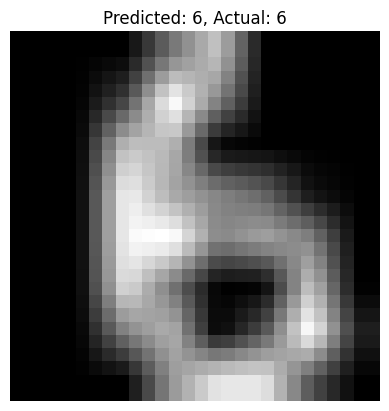

In [36]:
def predict_custom(index):
    img = x_test[index]
    pred = model.predict(img.reshape(1, 28, 28, 1))
    plt.imshow(img.reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {np.argmax(pred)}, Actual: {y_test[index]}")
    plt.axis('off')
    plt.show()

predict_custom(0)
